# CARREGANDO BIBLIOTECAS E DADOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
from IPython.display import Image
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.io as pio
plt.style.use('ggplot')
pio.renderers.default = "notebook_connected"

In [2]:
lombalgia = pd.read_csv(r'.../lombalgia.csv')
cervicalgia = pd.read_csv(r'.../cervicalgia.csv')
dor_tornozelo = pd.read_csv(r'.../dor_tornozelo.csv')
entorse_tornozelo = pd.read_csv(r'.../entorse_tornozelo.csv')
oa_joelho = pd.read_csv(r'.../joelho_oa.csv')
dor_ombro = pd.read_csv(r'.../dor_ombro.csv')

# LOMBALGIA

In [4]:
print(f'Sobre o tema LOMBALGIA foram encontrados {lombalgia.shape[0]} estudos, desde o ano {lombalgia["ano"].min()}.')

Sobre o tema LOMBALGIA foram encontrados 2927 estudos, desde o ano 1955.


## 1.Estudos através dos anos

### 1.1.Criando dataframe

In [3]:
# lombalgia.drop(columns=['Unnamed: 0'], inplace=True)
lombalgia['ano'].replace(1000, 2016, inplace=True)
lombalgia_grafico_anos = lombalgia.groupby('ano')['tipo estudo'].value_counts().to_frame()
lombalgia_grafico_anos.columns = ['quantidade']
lombalgia_grafico_anos.reset_index(inplace=True)
lombalgia_grafico_anos.rename(columns={'tipo estudo':'tipo de estudo'}, inplace=True)

### 1.2.Gráfico de linha

In [5]:
fig = px.line(data_frame=lombalgia_grafico_anos, x="ano", y="quantidade",
              color="tipo de estudo", title=f'LOMBALGIA (1955 - 2022): {lombalgia.shape[0]} estudos')

fig.update_layout(
    title_font=dict(size=18),
    xaxis_title="",
    yaxis_title="Quantidade",
    legend_title='Tipo de estudo',
    legend=dict(y=0.87, x=0.0775),
    width=810, height=500,
    font=dict(size=13))

fig.show()

c:\Users\55199\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning:

urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!



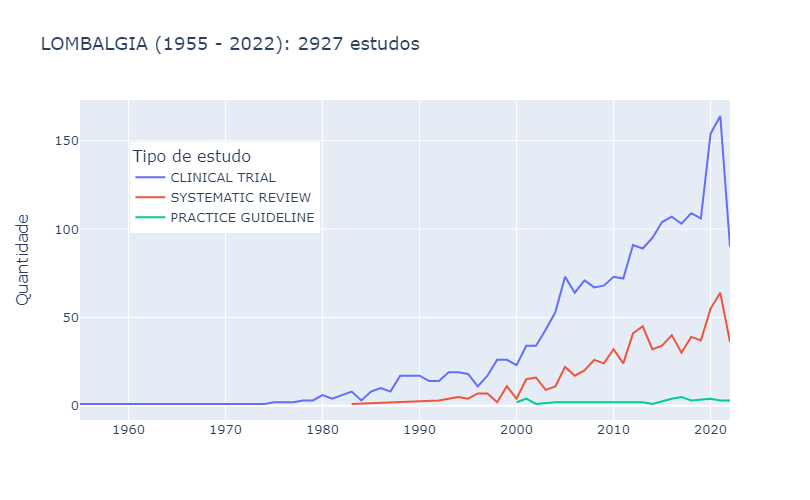

In [6]:
Image(filename='.../lombalgia1.png')

## 2.Qualidade dos ensaios

### 2.1.Criando dataframe

In [7]:
lombalgia_nota = lombalgia[lombalgia['tipo estudo'] == 'CLINICAL TRIAL']
lombalgia_nota['escala pedro'] = lombalgia_nota['escala pedro'].apply(lambda x: np.nan if x == 'B' or x == 'T' or x == '0' else int(x))

C:\Users\55199\AppData\Local\Temp\ipykernel_13064\2894774818.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Criando coluna indicando a qual decada o estudo pertence

In [8]:
# Função
def decada(x):
    if 1950 <= x < 1960:
        return 1950
    elif 1960 <= x < 1970:
        return 1960
    elif 1970 <= x < 1980:
        return 1970
    elif 1980 <= x < 1990:
        return 1980
    elif 1990 <= x < 2000:
        return 1990
    elif 2000 <= x < 2010:
        return 2000
    elif 2010 <= x < 2020:
        return 2010
    else:
        return 2020

In [9]:
lombalgia_nota['decada'] = lombalgia_nota['ano'].apply(decada)

C:\Users\55199\AppData\Local\Temp\ipykernel_13064\388790789.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 2.2.Histograma

In [10]:
fig = px.histogram(data_frame=lombalgia_nota, x="escala pedro", histnorm='percent',
                   title=f'LOMBALGIA (1955 - 2022): Qualidade de {lombalgia_nota.shape[0]} ensaios clínicos')

fig.update_layout(
    title_font=dict(size=18),
    xaxis_title="Pontuação na Escala PEDro",
    yaxis_title="Porcentagem (%)",
    width=810, height=500,
    font=dict(size=13))

fig.show()

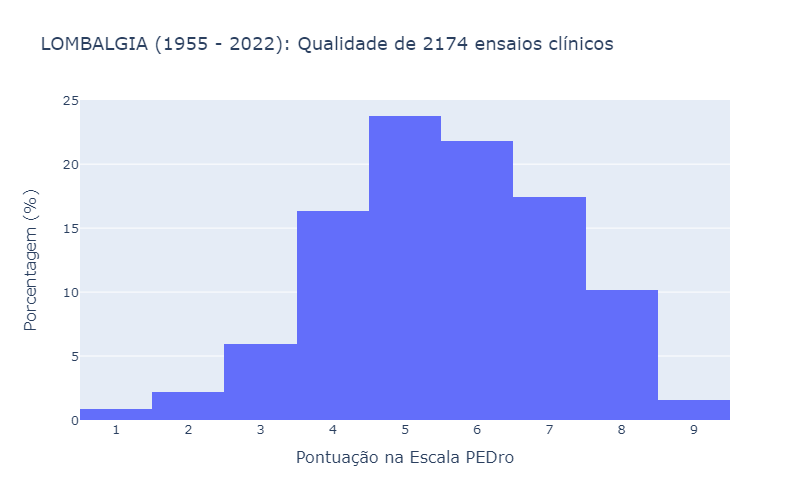

In [11]:
Image(filename='.../lombalgia2.png')

### 2.3 Gráfico de barras

#### Investigando propoção de artigos de baixa e alta qualidade

- Aqui os estudos foram divididos entre alta qualidade (PEDro > 6) e baixa qualidade (PEDro <= 6), para tentar observar se ao longo dos anos os ensaios clínicos foram produzidos com maior rigor científico.

#### Função para qualidade dos estudos

In [12]:
def class_estudo(x):
    if x > 6:
        return 'Alta qualidade (> 6 escala PEDro)'
    else:
        return 'Baixa qualidade (≤ 6 escala PEDro)'

lombalgia_nota['qualidade'] = lombalgia_nota['escala pedro'].apply(class_estudo)

C:\Users\55199\AppData\Local\Temp\ipykernel_13064\2980423437.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Criando dataset

In [13]:
lombalgia_qualidade = lombalgia_nota.groupby('decada')['qualidade'].value_counts().to_frame()
lombalgia_qualidade.columns = ['quantidade']
lombalgia_qualidade.reset_index(inplace=True)

In [14]:
fig = px.bar(lombalgia_qualidade, x='decada', y='quantidade', color='qualidade', 
             title=f"LOMBALGIA: Qualidade dos ensaios clínicos",
            )

fig.update_layout(
    title_font=dict(size=18),
    legend_title='',
    legend=dict(y=0.78, x=0.085),
    xaxis_title="",
    yaxis_title="Quantidade",
    width=810, height=500,
    font=dict(size=13))


fig.show()

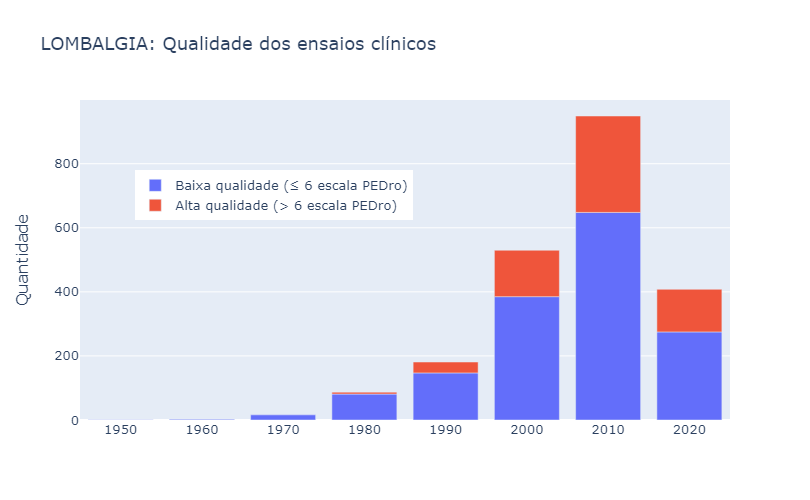

In [15]:
Image(filename='.../lombalgia3.png')

## 3.Linha do tempo

### 3.1.Criando dataframe

In [16]:
df_lombalgia1 = lombalgia_nota.groupby('decada')['escala pedro'].median().to_frame()
df_lombalgia2 = lombalgia_qualidade.groupby('decada')['quantidade'].sum().to_frame()
df_lombalgia3 = pd.concat([df_lombalgia1, df_lombalgia2], axis=1)
df_lombalgia3 = df_lombalgia3.reset_index()
df_lombalgia3

,decada,escala pedro,quantidade
0,1950,2.0,1
1,1960,4.0,2
2,1970,3.5,16
3,1980,4.0,87
4,1990,5.0,181
5,2000,6.0,530
6,2010,6.0,949
7,2020,6.0,408


### 3.2.Gráfico de linha

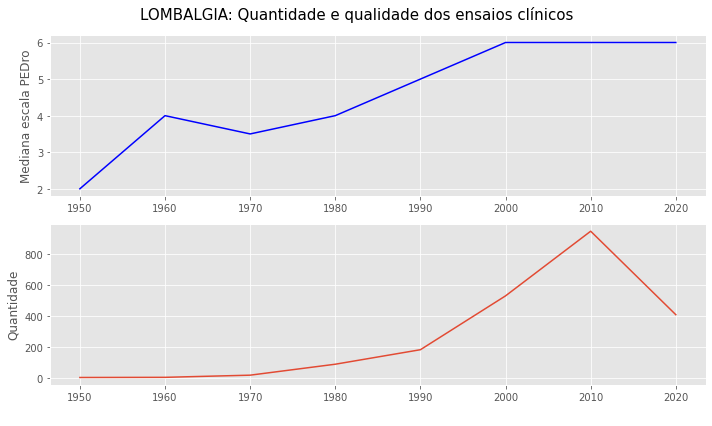

In [79]:
plt.figure(figsize=(10,6))
plt.suptitle('LOMBALGIA: Quantidade e qualidade dos ensaios clínicos', fontsize=(15))
plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df_lombalgia3, x='decada', y='escala pedro', color='blue')
plt.xlabel('')
ax.set(ylabel='Mediana escala PEDro')
plt.subplot(2, 1, 2)
ax1 = sns.lineplot(data=df_lombalgia3, x='decada', y='quantidade')
ax1.set(ylabel='Quantidade')
plt.xlabel(' ')

plt.tight_layout()

#### Imagem

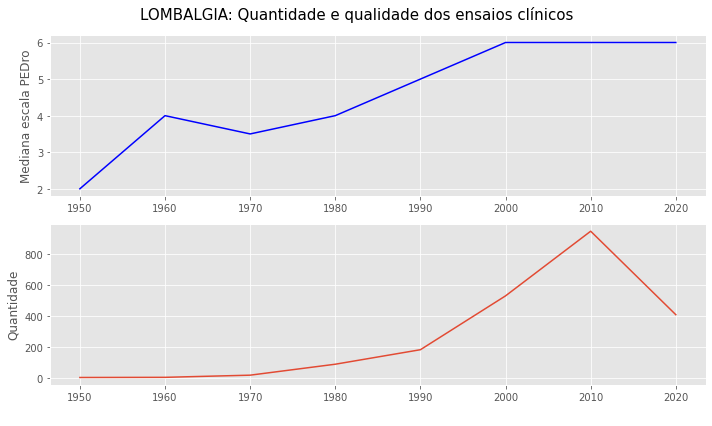

In [17]:
Image(filename='.../lombalgia4.png')

# CERVICALGIA

In [18]:
print(f'Sobre o tema cervicalgia foram encontrados {cervicalgia.shape[0]} estudos desde o ano {cervicalgia["ano"].min()}.')

Sobre o tema cervicalgia foram encontrados 1482 estudos desde o ano 1966.


## 1.Estudos através dos anos

### 1.1.Criando dataframe

In [19]:
cervicalgia.drop(columns=['Unnamed: 0'], inplace=True)
cervicalgia_grafico_anos = cervicalgia.groupby('ano')['tipo estudo'].value_counts().to_frame()
cervicalgia_grafico_anos.columns = ['quantidade']
cervicalgia_grafico_anos.reset_index(inplace=True)
cervicalgia_grafico_anos.head(5)
cervicalgia_grafico_anos.rename(columns={'tipo estudo':'tipo de estudo'}, inplace=True)

### 1.2.Gráfico de linha

In [20]:
fig = px.line(data_frame=cervicalgia_grafico_anos, x="ano", y="quantidade", color="tipo de estudo", 
              title= f'CERVICALGIA (1966 - 2022): {cervicalgia.shape[0]} estudos')

fig.update_layout(
    title_font=dict(size=18),
    xaxis_title="",
    yaxis_title="Quantidade",
    legend_title='Tipo de estudo',
    legend=dict(y=0.87, x=0.0775),
    width=810, height=500,
    font=dict(size=13))

fig.show()

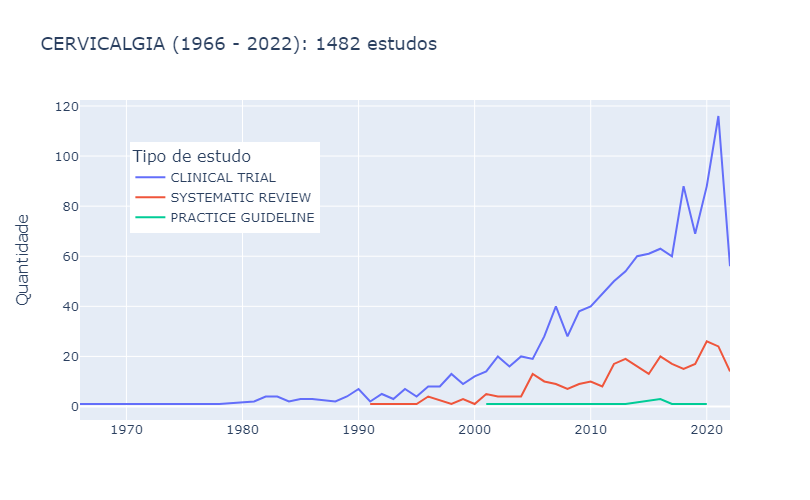

In [22]:
Image(filename='.../cervicalgia1.png')

## 2.Qualidade dos ensaios

### 2.1.Criando dataframe

In [23]:
cervicalgia_nota = cervicalgia[cervicalgia['tipo estudo'] == 'CLINICAL TRIAL']
cervicalgia_nota['escala pedro'] = cervicalgia_nota['escala pedro'].apply(lambda x: np.nan if x == 'T' else int(x))

C:\Users\55199\AppData\Local\Temp\ipykernel_13064\797954401.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Criando coluna indicando a qual decada o estudo pertence

In [24]:
cervicalgia_nota['decada'] = cervicalgia_nota['ano'].apply(decada)

C:\Users\55199\AppData\Local\Temp\ipykernel_13064\820726395.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 2.2.Histograma

In [25]:
fig = px.histogram(data_frame=cervicalgia_nota, x="escala pedro", histnorm='percent',
                   title=f'CERVICALGIA (1966 - 2022): Qualidade de {cervicalgia_nota.shape[0]} ensaios clínicos')

fig.update_layout(
    title_font=dict(size=18),
    xaxis_title="Pontuação na Escala PEDro",
    yaxis_title="Porcentagem (%)",
    width=810, height=500,
    font=dict(size=13))

fig.show()

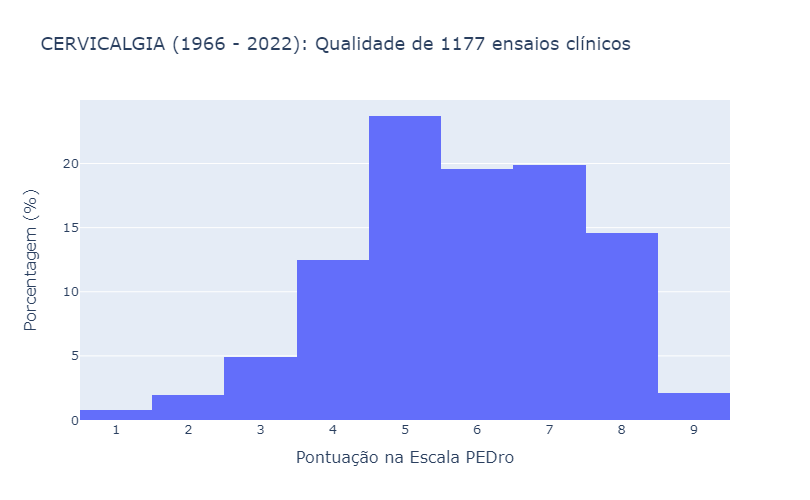

In [26]:
Image(filename='.../cervicalgia2.png')

### 2.3 Gráfico de barras

In [23]:
cervicalgia_nota['qualidade'] = cervicalgia_nota['escala pedro'].apply(class_estudo)
cervicalgia_qualidade = cervicalgia_nota.groupby('decada')['qualidade'].value_counts().to_frame()
cervicalgia_qualidade.columns = ['quantidade']
cervicalgia_qualidade.reset_index(inplace=True)

C:\Users\55199\AppData\Local\Temp\ipykernel_1060\2507917281.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
fig = px.bar(cervicalgia_qualidade, x='decada', y='quantidade', color='qualidade', 
             title='CERVICALGIA: Qualidade dos ensaios clínicos',
             )

fig.update_layout(
    title_font=dict(size=18),
    legend_title='',
    legend=dict(y=0.78, x=0.085),
    xaxis_title="",
    yaxis_title="Quantidade",
    width=810, height=500,
    font=dict(size=13))

fig.show()

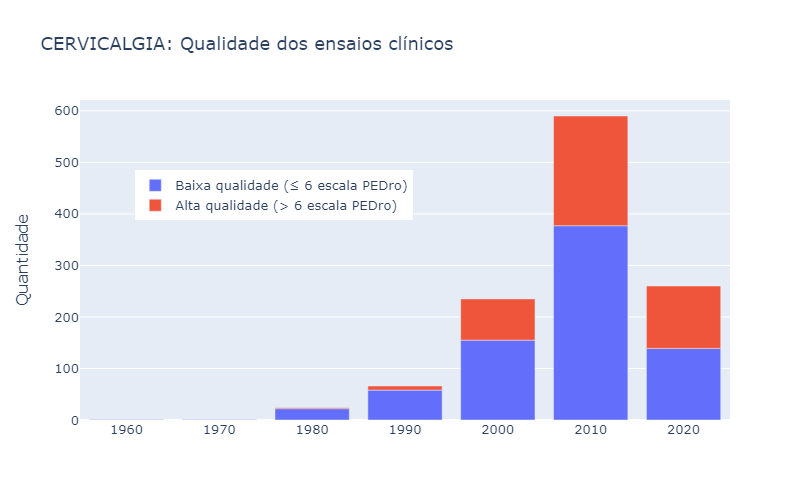

In [27]:
Image(filename='.../cervicalgia3.png')

## 3.Linha do tempo

#### 3.1 Criando dataframe

In [25]:
df_cervicalgia1 = cervicalgia_nota.groupby('decada')['escala pedro'].median().to_frame()
df_cervicalgia2 = cervicalgia_qualidade.groupby('decada')['quantidade'].sum().to_frame()
df_cervicalgia3 = pd.concat([df_cervicalgia1, df_cervicalgia2], axis=1)
df_cervicalgia3 = df_cervicalgia3.reset_index()
df_cervicalgia3

,decada,escala pedro,quantidade
0,1960,3.0,1
1,1970,1.0,1
2,1980,4.5,24
3,1990,5.0,66
4,2000,6.0,235
5,2010,6.0,590
6,2020,6.0,260


#### 3.2.Gráfico de linha

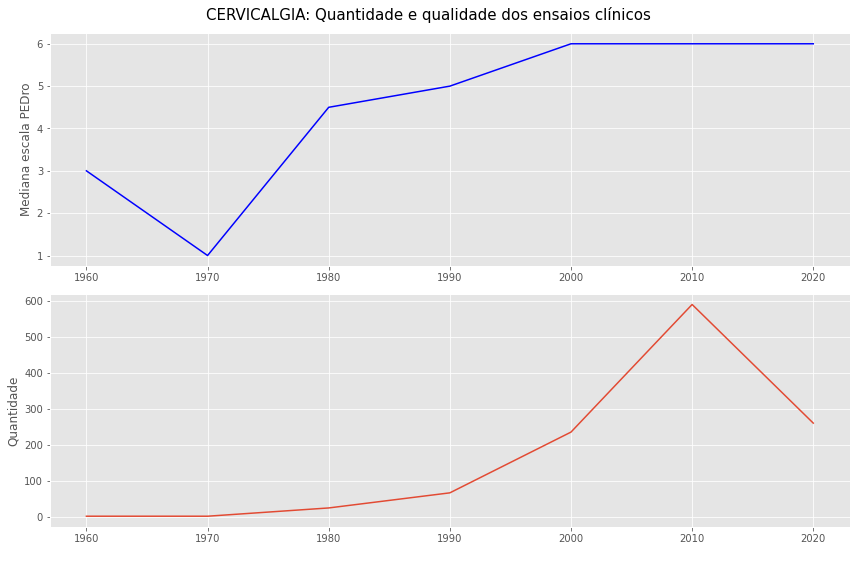

In [78]:
plt.figure(figsize=(12,8))
plt.suptitle('CERVICALGIA: Quantidade e qualidade dos ensaios clínicos', fontsize=(15))
plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df_cervicalgia3, x='decada', y='escala pedro', color='blue')
plt.xlabel('')
ax.set(ylabel='Mediana escala PEDro')
plt.subplot(2, 1, 2)
ax1 = sns.lineplot(data=df_cervicalgia3, x='decada', y='quantidade')
ax1.set(ylabel='Quantidade')
plt.xlabel(' ')

plt.tight_layout()

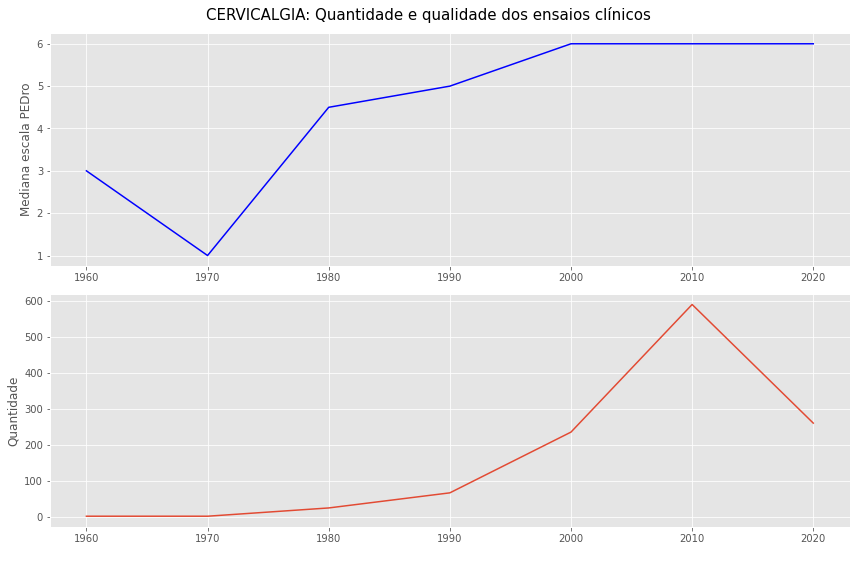

In [28]:
Image(filename='.../cervicalgia4.png')

# OSTEOATROSE DE JOELHO

In [ ]:
print(f'Sobre o tema osteoartrose de joelho foram encontrados {oa_joelho.shape[0]} estudos desde o ano {oa_joelho["ano"].min()}.')

Sobre o tema osteoartrose de joelho foram encontrados 1750 estudos desde o ano 1952.


## 1.Estudos através dos anos

### 1.1.Criando dataframe

In [28]:
oa_joelho.drop(columns=['Unnamed: 0'], inplace=True)
oa_joelho_grafico_anos = oa_joelho.groupby('ano')['tipo estudo'].value_counts().to_frame()
oa_joelho_grafico_anos.columns = ['quantidade']
oa_joelho_grafico_anos.reset_index(inplace=True)
oa_joelho_grafico_anos.head(5)
oa_joelho_grafico_anos.rename(columns={'tipo estudo':'tipo de estudo'}, inplace=True)

### 1.2.Gráfico de linha

#### Versão interativa

In [30]:
fig = px.line(data_frame=oa_joelho_grafico_anos, x="ano", y="quantidade", color="tipo de estudo", 
              title=f'OSTEOARTROSE DE JOELHO (1952 - 2022): {oa_joelho.shape[0]} estudos')

fig.update_layout(
    title_font=dict(size=18),
    xaxis_title="",
    yaxis_title="Quantidade",
    legend_title='Tipo de estudo',
    legend=dict(y=0.87, x=0.0775),
    width=810, height=500,
    font=dict(size=13))

fig.show()

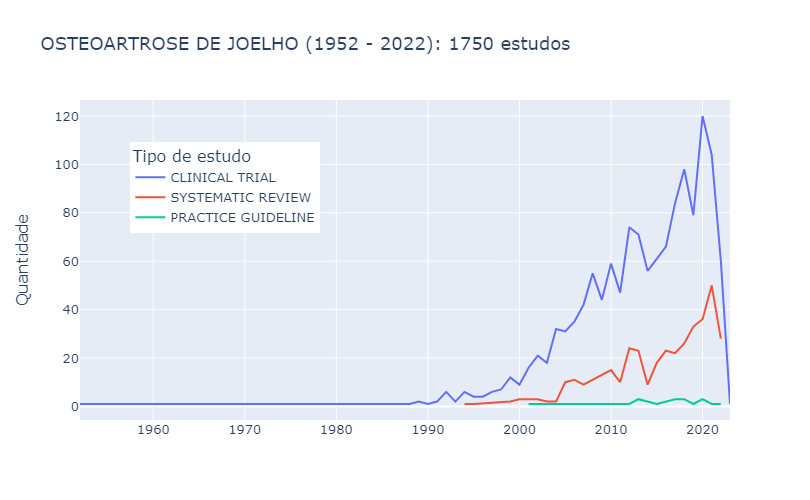

In [44]:
Image(filename='.../oa_joelho1.png')

## 2.Qualidade dos ensaios

### 2.1.Criando dataframe

In [32]:
oa_joelho_nota = oa_joelho[oa_joelho['tipo estudo'] == 'CLINICAL TRIAL']
oa_joelho_nota['escala pedro'] = oa_joelho_nota['escala pedro'].apply(lambda x: np.nan if x == 'T' else int(x))

C:\Users\55199\AppData\Local\Temp\ipykernel_1060\3503808130.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
oa_joelho_nota['decada'] = oa_joelho_nota['ano'].apply(decada)

C:\Users\55199\AppData\Local\Temp\ipykernel_1060\1563146439.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 2.2.Histograma

In [34]:
fig = px.histogram(data_frame=oa_joelho_nota, x="escala pedro", histnorm='percent', 
                   title=f'OSTEOARTROSE DE JOELHO (1952 - 2022): Qualidade de {oa_joelho_nota.shape[0]} ensaios clínicos')

fig.update_layout(
    title_font=dict(size=18),
    xaxis_title="Pontuação na Escala PEDro",
    yaxis_title="Porcentagem (%)",
    width=810, height=500,
    font=dict(size=13))

fig.show()

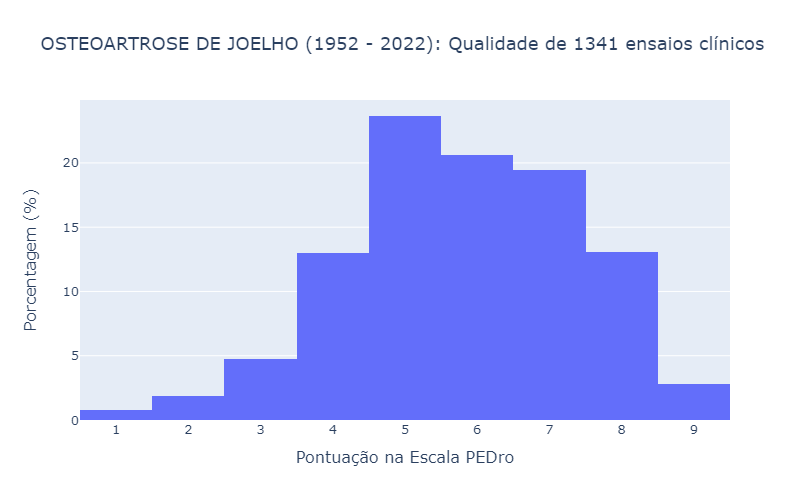

In [43]:
Image(filename='.../oa_joelho2.png')

### 2.3 Gráfico de barras

In [35]:
oa_joelho_nota['qualidade'] = oa_joelho_nota['escala pedro'].apply(class_estudo)
oa_joelho_qualidade = oa_joelho_nota.groupby('decada')['qualidade'].value_counts().to_frame()
oa_joelho_qualidade.columns = ['quantidade']
oa_joelho_qualidade.reset_index(inplace=True)

C:\Users\55199\AppData\Local\Temp\ipykernel_1060\1744401743.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
fig = px.bar(oa_joelho_qualidade, x='decada', y='quantidade', color='qualidade', 
             title='OSTEOARTROSE DE JOELHO: Qualidade dos ensaios clínicos'
             )

fig.update_layout(
    title_font=dict(size=18),
    legend_title='',
    legend=dict(y=0.78, x=0.085),
    xaxis_title="",
    yaxis_title="Quantidade",
    width=810, height=500,
    font=dict(size=13))

fig.show()

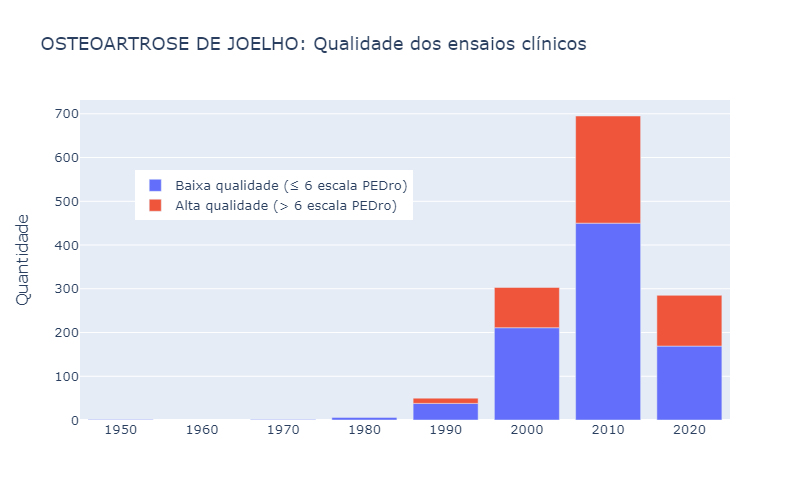

In [42]:
Image(filename='.../oa_joelho3.png')

## 3.Linha do tempo

#### 3.1 Criando dataframe

In [38]:
df_oa_joelho1 = oa_joelho_nota.groupby('decada')['escala pedro'].median().to_frame()
df_oa_joelho2 = oa_joelho_qualidade.groupby('decada')['quantidade'].sum().to_frame()
df_oa_joelho3 = pd.concat([df_oa_joelho1, df_oa_joelho2], axis=1)
df_oa_joelho3 = df_oa_joelho3.reset_index()
df_oa_joelho3

,decada,escala pedro,quantidade
0,1950,5.0,1
1,1970,3.0,1
2,1980,3.0,6
3,1990,5.0,50
4,2000,5.0,303
5,2010,6.0,695
6,2020,6.0,285


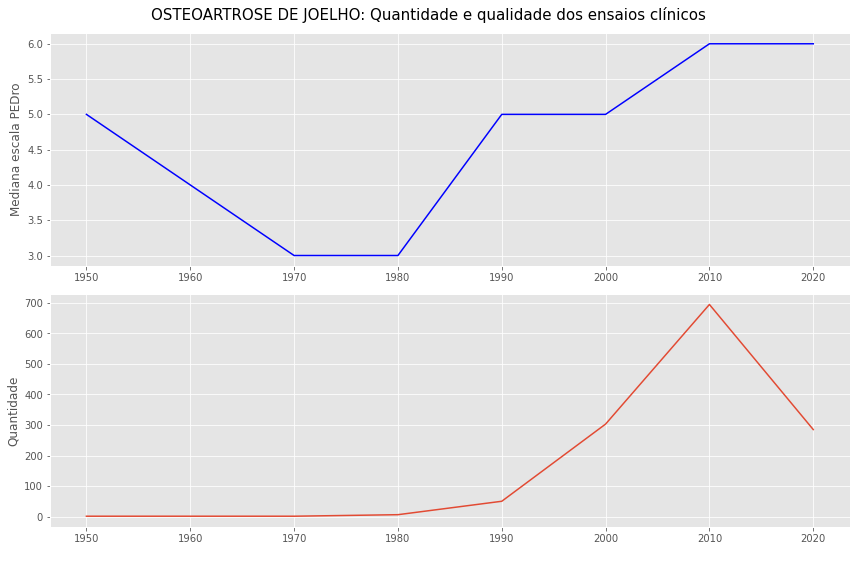

In [77]:
plt.figure(figsize=(12,8))
plt.suptitle('OSTEOARTROSE DE JOELHO: Quantidade e qualidade dos ensaios clínicos', fontsize=(15))
plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df_oa_joelho3, x='decada', y='escala pedro', color='blue')
plt.xlabel('')
ax.set(ylabel='Mediana escala PEDro')
plt.subplot(2, 1, 2)
ax1 = sns.lineplot(data=df_oa_joelho3, x='decada', y='quantidade')
ax1.set(ylabel='Quantidade')
plt.xlabel(' ')

plt.tight_layout()

#### Imagem

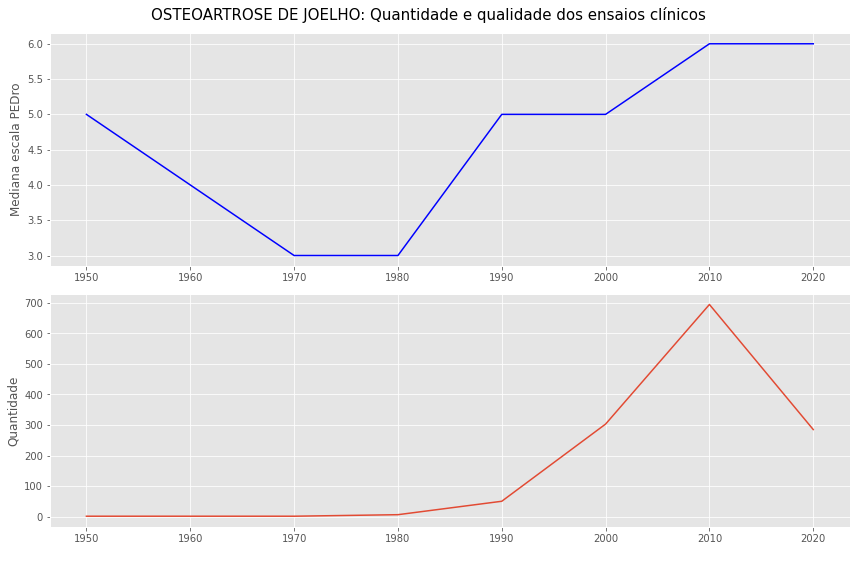

In [41]:
Image(filename='.../oa_joelho4.png')

# ENTORSE DE TORNOZELO

In [ ]:
print(f'Sobre o tema entorse de tornozelo foram encontrados {entorse_tornozelo.shape[0]} estudos desde o ano {entorse_tornozelo["ano"].min()}')

Sobre o tema entorse de tornozelo foram encontrados 210 estudos desde o ano 1966


## 1.Estudos através dos anos

### 1.1.Criando dataframe

In [40]:
entorse_tornozelo.drop(columns=['Unnamed: 0'], inplace=True)
entorse_tornozelo_grafico_anos = entorse_tornozelo.groupby('ano')['tipo estudo'].value_counts().to_frame()
entorse_tornozelo_grafico_anos.columns = ['quantidade']
entorse_tornozelo_grafico_anos.reset_index(inplace=True)
entorse_tornozelo_grafico_anos.head(5)
entorse_tornozelo_grafico_anos.rename(columns={'tipo estudo':'tipo de estudo'}, inplace=True)

### 1.2.Gráfico de linha

#### Versão interativa

In [42]:
fig = px.line(data_frame=entorse_tornozelo_grafico_anos, x="ano", y="quantidade", color="tipo de estudo", 
              title=f'ENTORSE DE TORNOZELO (1966 - 2022): {entorse_tornozelo.shape[0]} estudos')

fig.update_layout(
    title_font=dict(size=18),
    xaxis_title="",
    yaxis_title="Quantidade",
    legend_title='Tipo de estudo',
    legend=dict(y=0.87, x=0.0775),
    width=810, height=500,
    font=dict(size=13))

fig.show()

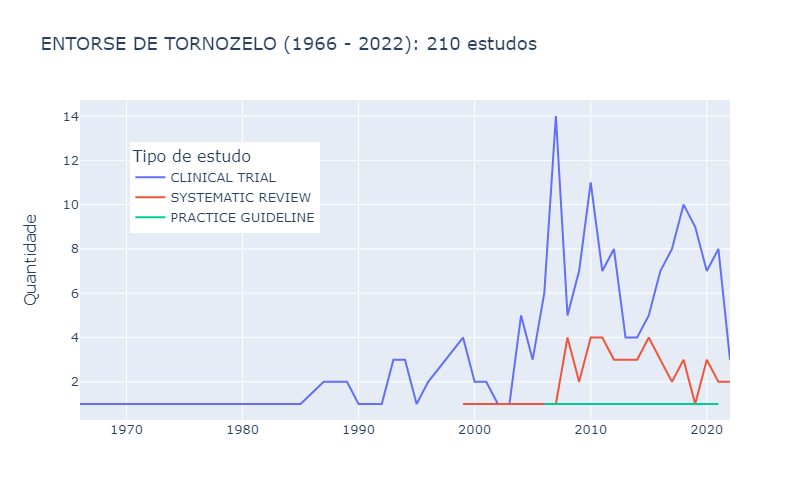

In [40]:
Image(filename='.../entorse_tornozelo1.png')

## 2.Qualidade dos ensaios

### 2.1.Criando dataframe

In [46]:
entorse_tornozelo_nota = entorse_tornozelo[entorse_tornozelo['tipo estudo'] == 'CLINICAL TRIAL']
entorse_tornozelo_nota['escala pedro'] = entorse_tornozelo_nota['escala pedro'].apply(lambda x: np.nan if x == 'T' else int(x))

C:\Users\55199\AppData\Local\Temp\ipykernel_13064\207483341.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
entorse_tornozelo_nota['decada'] = entorse_tornozelo_nota['ano'].apply(decada)

C:\Users\55199\AppData\Local\Temp\ipykernel_13064\1885211839.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 2.2.Histograma

In [48]:
fig = px.histogram(data_frame=entorse_tornozelo_nota, x="escala pedro", histnorm='percent',
                   title=f'ENTORSE DE TORNOZELO (1966 - 2022): Qualidade de {entorse_tornozelo_nota.shape[0]} ensaios clínicos')

fig.update_layout(
    title_font=dict(size=18),
    xaxis_title="Pontuação na Escala PEDro",
    yaxis_title="Porcentagem (%)",
    width=810, height=500,
    font=dict(size=13))
fig.show()

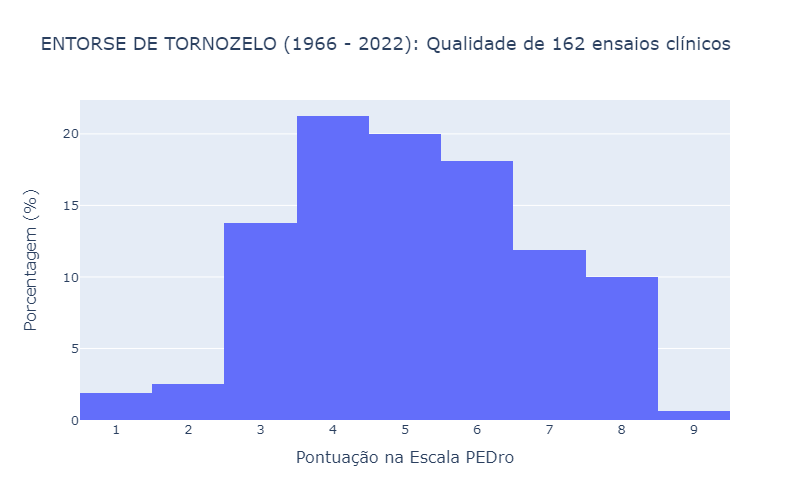

In [49]:
Image(filename='.../entorse_tornozelo2.png')

### 2.3 Gráfico de barras

In [50]:
entorse_tornozelo_nota['qualidade'] = entorse_tornozelo_nota['escala pedro'].apply(class_estudo)
entorse_tornozelo_qualidade = entorse_tornozelo_nota.groupby('decada')['qualidade'].value_counts().to_frame()
entorse_tornozelo_qualidade.columns = ['quantidade']
entorse_tornozelo_qualidade.reset_index(inplace=True)

C:\Users\55199\AppData\Local\Temp\ipykernel_13064\2935129232.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
fig = px.bar(entorse_tornozelo_qualidade, x='decada', y='quantidade', color='qualidade', 
             title='ENTORSE DE TORNOZELO: Qualidade dos ensaios clínicos'
             )

fig.update_layout(
    title_font=dict(size=18),
    legend_title='',
    legend=dict(y=0.78, x=0.085),
    xaxis_title="",
    yaxis_title="Quantidade",
    width=810, height=500,
    font=dict(size=13))

fig.show()

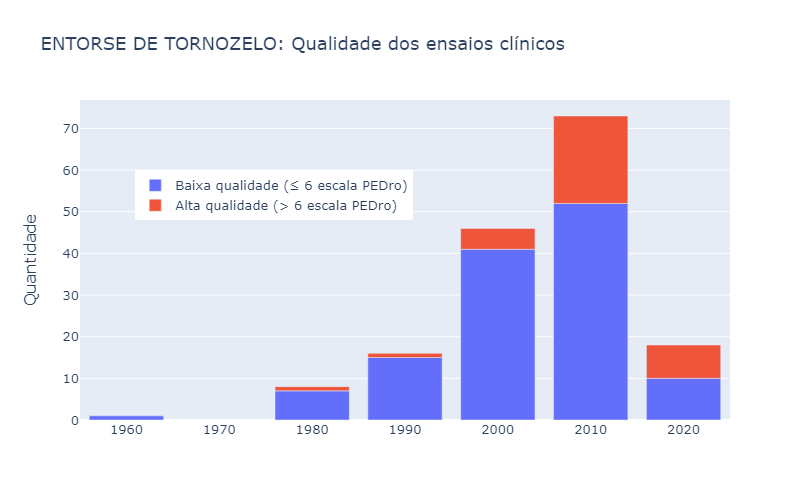

In [38]:
Image(filename='.../entorse_tornozelo3.png')

## 3.Linha do tempo

#### 3.1 Criando dataframe

In [52]:
df_entorse_tornozelo1 = entorse_tornozelo_nota.groupby('decada')['escala pedro'].median().to_frame()
df_entorse_tornozelo2 = entorse_tornozelo_qualidade.groupby('decada')['quantidade'].sum().to_frame()
df_entorse_tornozelo3 = pd.concat([df_entorse_tornozelo1, df_entorse_tornozelo2], axis=1)
df_entorse_tornozelo3 = df_entorse_tornozelo3.reset_index()
df_entorse_tornozelo3

,decada,escala pedro,quantidade
0,1960,2.0,1
1,1980,4.0,8
2,1990,4.0,16
3,2000,5.0,46
4,2010,6.0,73
5,2020,6.0,18


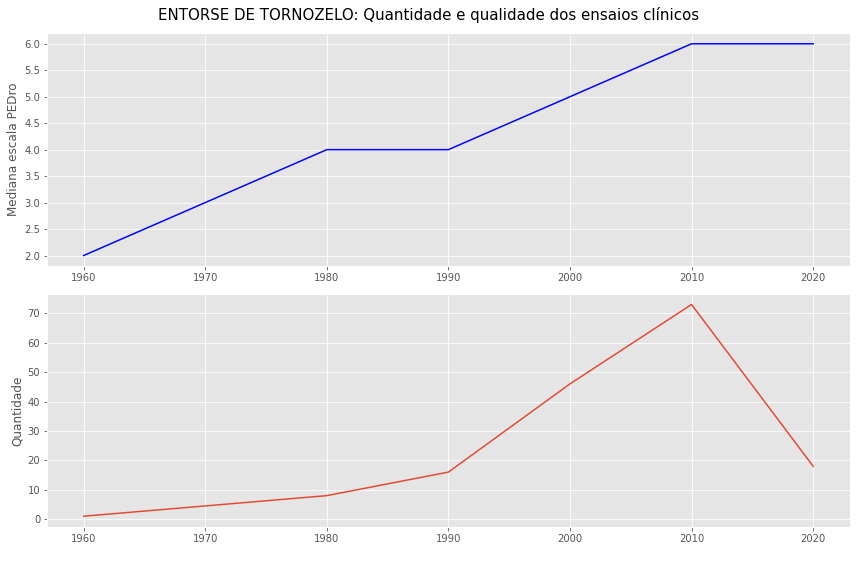

In [53]:
plt.figure(figsize=(12,8))
plt.suptitle('ENTORSE DE TORNOZELO: Quantidade e qualidade dos ensaios clínicos', fontsize=(15))
plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df_entorse_tornozelo3, x='decada', y='escala pedro', color='blue')
plt.xlabel('')
ax.set(ylabel='Mediana escala PEDro')
plt.subplot(2, 1, 2)
ax1 = sns.lineplot(data=df_entorse_tornozelo3, x='decada', y='quantidade')
ax1.set(ylabel='Quantidade')
plt.xlabel(' ')

plt.tight_layout()

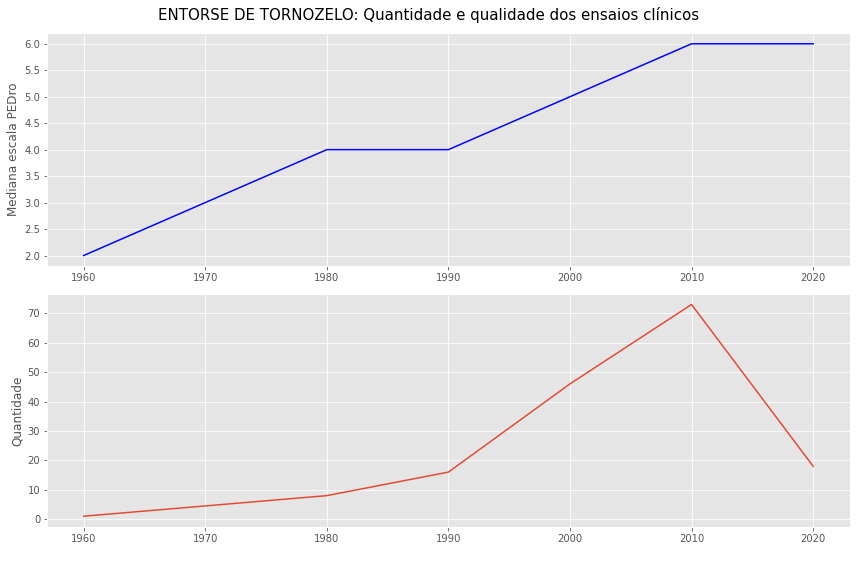

In [54]:
Image(filename='.../entorse_tornozelo4.png')

# DOR TORNOZELO

In [55]:
print(f'Sobre o tema dor no tornozelo foram encontrados {dor_tornozelo.shape[0]} estudos desde o ano {dor_tornozelo["ano"].min()}.')

Sobre o tema dor no tornozelo foram encontrados 425 estudos desde o ano 1975.


## 1.Estudos através dos anos

### 1.1.Criando dataframe

In [56]:
dor_tornozelo.drop(columns=['Unnamed: 0'], inplace=True)
dor_tornozelo_grafico_anos = dor_tornozelo.groupby('ano')['tipo estudo'].value_counts().to_frame()
dor_tornozelo_grafico_anos.columns = ['quantidade']
dor_tornozelo_grafico_anos.reset_index(inplace=True)
dor_tornozelo_grafico_anos.head(5)
dor_tornozelo_grafico_anos.rename(columns={'tipo estudo':'tipo de estudo'}, inplace=True)

### 1.2.Gráfico de linha

In [57]:
fig = px.line(data_frame=dor_tornozelo_grafico_anos, x="ano", y="quantidade", color="tipo de estudo", 
              title=f'DOR TORNOZELO (1975 - 2022): {dor_tornozelo.shape[0]} estudos')

fig.update_layout(
    title_font=dict(size=18),
    xaxis_title="",
    yaxis_title="Quantidade",
    legend_title='Tipo de estudo',
    legend=dict(y=0.87, x=0.0775),
    width=810, height=500,
    font=dict(size=13))

fig.show()

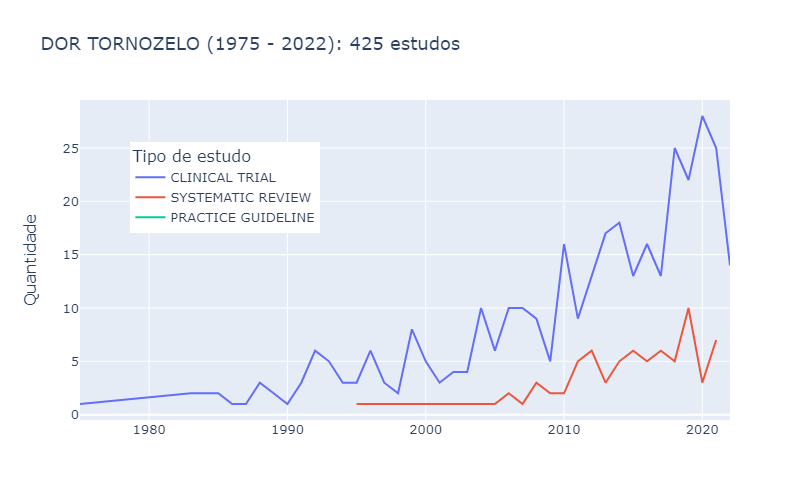

In [58]:
Image(filename='.../dor_tornozelo1.png')

## 2.Qualidade dos ensaios

### 2.1.Criando dataframe

In [59]:
dor_tornozelo_nota = dor_tornozelo[dor_tornozelo['tipo estudo'] == 'CLINICAL TRIAL']
dor_tornozelo_nota['escala pedro'] = dor_tornozelo_nota['escala pedro'].apply(lambda x: np.nan if x == 'T' or x =='0' else int(x))

C:\Users\55199\AppData\Local\Temp\ipykernel_13064\3635078689.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
dor_tornozelo_nota['decada'] = dor_tornozelo_nota['ano'].apply(decada)

C:\Users\55199\AppData\Local\Temp\ipykernel_13064\2861325911.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 2.2.Histograma

In [61]:
fig = px.histogram(data_frame=dor_tornozelo_nota, x="escala pedro", histnorm='percent',
                   title=f'DOR TORNOZELO (1975 - 2022): Qualidade de {dor_tornozelo_nota.shape[0]} ensaios clínicos')

fig.update_layout(
    title_font=dict(size=18),
    xaxis_title="Pontuação na Escala PEDro",
    yaxis_title="Porcentagem (%)",
    width=810, height=500,
    font=dict(size=13))

fig.show()

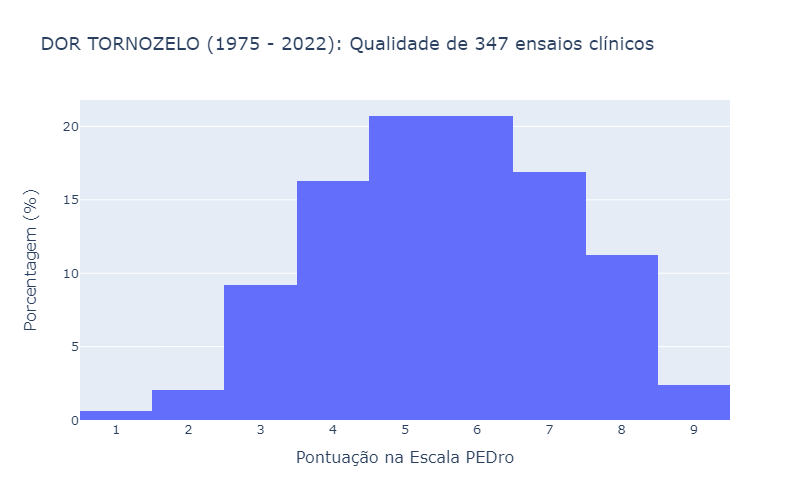

In [35]:
Image(filename='.../dor_tornozelo2.png')

### 2.3 Gráfico de barras

In [62]:
dor_tornozelo_nota['qualidade'] = dor_tornozelo_nota['escala pedro'].apply(class_estudo)
dor_tornozelo_qualidade = dor_tornozelo_nota.groupby('decada')['qualidade'].value_counts().to_frame()
dor_tornozelo_qualidade.columns = ['quantidade']
dor_tornozelo_qualidade.reset_index(inplace=True)

C:\Users\55199\AppData\Local\Temp\ipykernel_13064\1818145747.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
fig = px.bar(dor_tornozelo_qualidade, x='decada', y='quantidade', color='qualidade', 
             title='DOR NO TORNOZELO: Qualidade dos ensaios clínicos'
             )

fig.update_layout(
    title_font=dict(size=18),
    legend_title='',
    legend=dict(y=0.78, x=0.085),
    xaxis_title="",
    yaxis_title="Quantidade",
    width=810, height=500,
    font=dict(size=13))

fig.show()

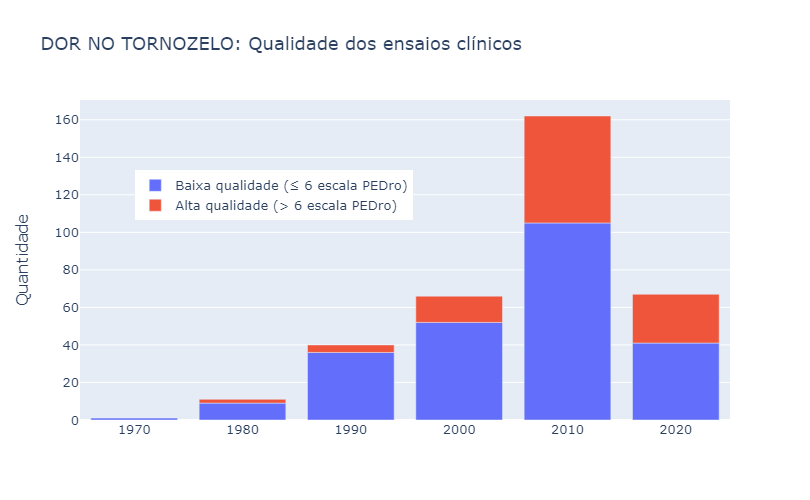

In [34]:
Image(filename='.../dor_tornozelo3.png')

## 3.Linha do tempo

#### 3.1 Criando dataframe

In [64]:
df_dor_tornozelo1 = dor_tornozelo_nota.groupby('decada')['escala pedro'].median().to_frame()
df_dor_tornozelo2 = dor_tornozelo_qualidade.groupby('decada')['quantidade'].sum().to_frame()
df_dor_tornozelo3 = pd.concat([df_dor_tornozelo1, df_dor_tornozelo2], axis=1)
df_dor_tornozelo3 = df_dor_tornozelo3.reset_index()
df_dor_tornozelo3

,decada,escala pedro,quantidade
0,1970,NaN,1
1,1980,4.0,11
2,1990,4.0,40
3,2000,5.0,66
4,2010,6.0,162
5,2020,6.0,67


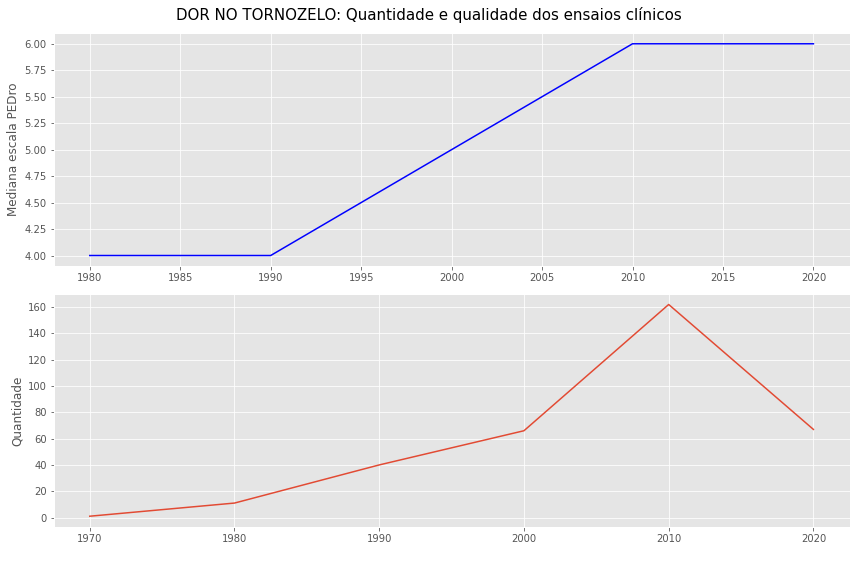

In [65]:
plt.figure(figsize=(12,8))
plt.suptitle('DOR NO TORNOZELO: Quantidade e qualidade dos ensaios clínicos', fontsize=(15))
plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df_dor_tornozelo3, x='decada', y='escala pedro', color='blue')
plt.xlabel('')
ax.set(ylabel='Mediana escala PEDro')
plt.subplot(2, 1, 2)
ax1 = sns.lineplot(data=df_dor_tornozelo3, x='decada', y='quantidade')
ax1.set(ylabel='Quantidade')
plt.xlabel(' ')

plt.tight_layout()

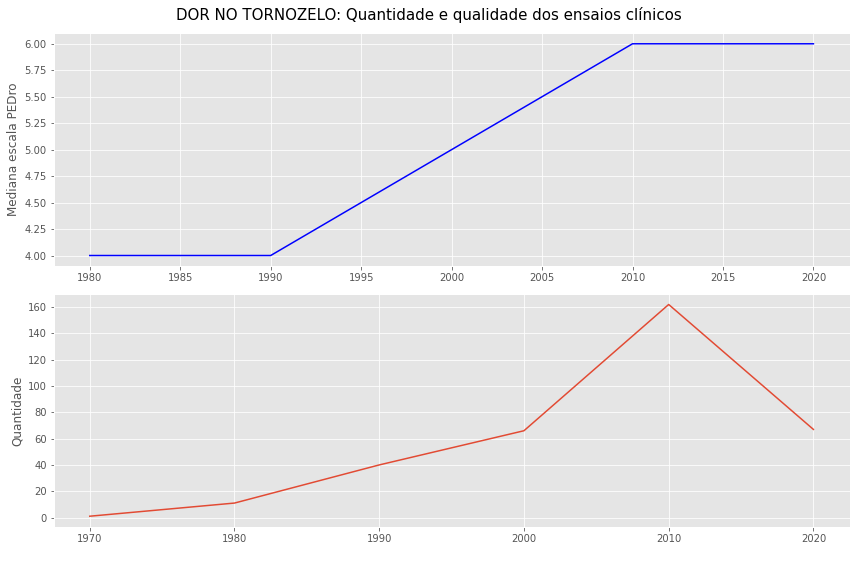

In [66]:
Image(filename='.../dor_tornozelo4.png')

# DOR OMBRO

In [67]:
print(f'Sobre o tema dor no ombro foram encontrados {dor_ombro.shape[0]} estudos desde o ano {dor_ombro["ano"].min()}.')

Sobre o tema dor no ombro foram encontrados 1429 estudos desde o ano 1974.


## 1.Estudos através dos anos

### 1.1.Criando dataframe

In [68]:
dor_ombro.drop(columns=['Unnamed: 0'], inplace=True)
dor_ombro_grafico_anos = dor_ombro.groupby('ano')['tipo estudo'].value_counts().to_frame()
dor_ombro_grafico_anos.columns = ['quantidade']
dor_ombro_grafico_anos.reset_index(inplace=True)
dor_ombro_grafico_anos.head(5)
dor_ombro_grafico_anos.rename(columns={'tipo estudo':'tipo de estudo'}, inplace=True)

### 1.2.Gráfico de linha

#### Versão interativa

In [69]:
fig = px.line(data_frame=dor_ombro_grafico_anos, x="ano", y="quantidade", color="tipo de estudo", 
              title=f'DOR NO OMBRO (1974 - 2022): {dor_ombro.shape[0]} estudos')

fig.update_layout(
    title_font=dict(size=18),
    xaxis_title="",
    yaxis_title="Quantidade",
    legend_title='Tipo de estudo',
    legend=dict(y=0.87, x=0.0775),
    width=810, height=500,
    font=dict(size=13))

fig.show()

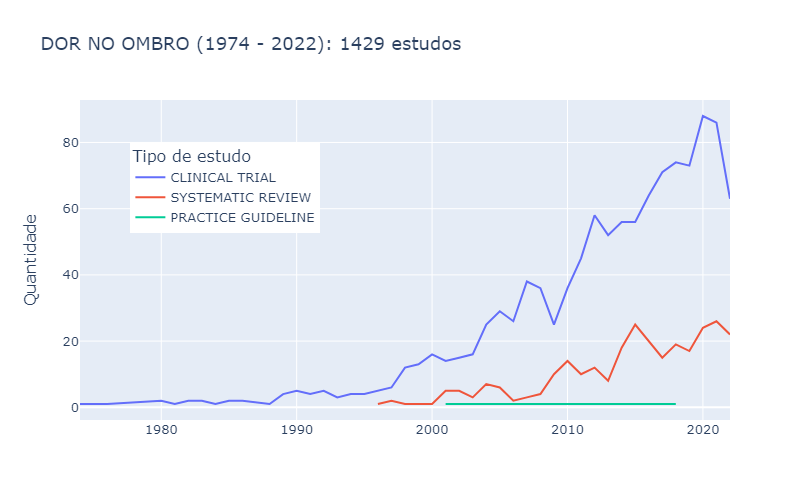

In [70]:
Image(filename='.../dor_ombro1.png')

## 2.Qualidade dos ensaios

### 2.1.Criando dataframe

In [71]:
caract = ['B', 'O', 'C', 'T', 'P', 'S', 'I', 'A', 'Q', '(', 'M', 'R']

In [72]:
dor_ombro_nota = dor_ombro[dor_ombro['tipo estudo'] == 'CLINICAL TRIAL']
dor_ombro_nota['escala pedro'] = dor_ombro_nota['escala pedro'].apply(lambda x: np.nan if x in caract else int(x))

C:\Users\55199\AppData\Local\Temp\ipykernel_13064\3290590886.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
dor_ombro_nota['decada'] = dor_ombro_nota['ano'].apply(decada)

C:\Users\55199\AppData\Local\Temp\ipykernel_13064\198501889.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 2.2.Histograma

In [68]:
fig = px.histogram(data_frame=dor_ombro_nota, x="escala pedro", histnorm='percent',
                   title=f'DOR NO OMBRO (1974 - 2022): Qualidade de {dor_ombro_nota.shape[0]} ensaios clínicos')

fig.update_layout(
    title_font=dict(size=18),
    xaxis_title="Pontuação na Escala PEDro",
    yaxis_title="Porcentagem (%)",
    width=810, height=500,
    font=dict(size=13))

fig.show()

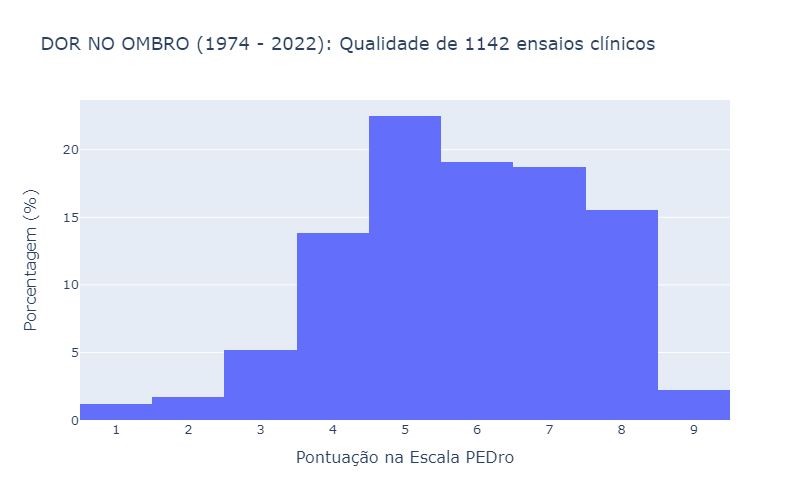

In [31]:
Image(filename='.../dor_ombro2.png')

### 2.3 Gráfico de barras

In [74]:
dor_ombro_nota['qualidade'] = dor_ombro_nota['escala pedro'].apply(class_estudo)
dor_ombro_qualidade = dor_ombro_nota.groupby('decada')['qualidade'].value_counts().to_frame()
dor_ombro_qualidade.columns = ['quantidade']
dor_ombro_qualidade.reset_index(inplace=True)

C:\Users\55199\AppData\Local\Temp\ipykernel_13064\859820038.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
fig = px.bar(dor_ombro_qualidade, x='decada', y='quantidade', color='qualidade', 
             title='DOR NO OMBRO: Qualidade dos ensaios clínicos sobre'
             )

fig.update_layout(
    title_font=dict(size=18),
    legend_title='',
    legend=dict(y=0.78, x=0.085),
    xaxis_title="",
    yaxis_title="Quantidade",
    width=810, height=500,
    font=dict(size=13))

fig.show()

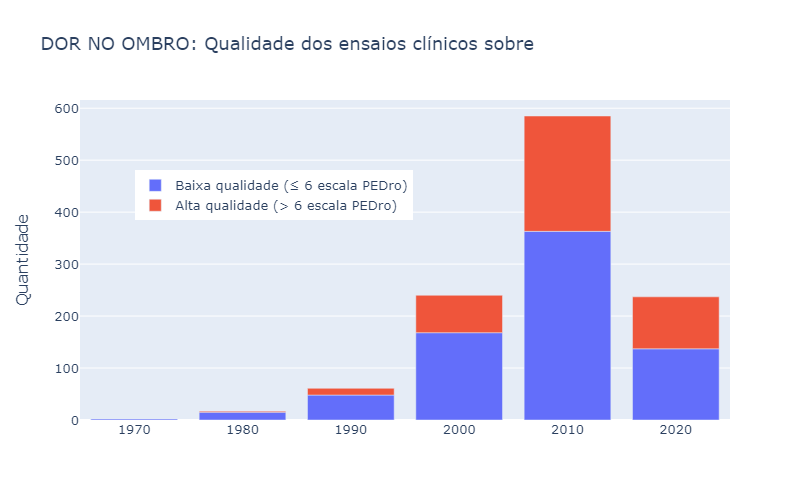

In [76]:
Image(filename='.../dor_ombro3.png')

## 3.Linha do tempo

#### 3.1 Criando dataframe

In [77]:
df_dor_ombro1 = dor_ombro_nota.groupby('decada')['escala pedro'].median().to_frame()
df_dor_ombro2 = dor_ombro_qualidade.groupby('decada')['quantidade'].sum().to_frame()
df_dor_ombro3 = pd.concat([df_dor_ombro1, df_dor_ombro2], axis=1)
df_dor_ombro3 = df_dor_ombro3.reset_index()
df_dor_ombro3

,decada,escala pedro,quantidade
0,1970,3.0,2
1,1980,5.0,17
2,1990,5.0,61
3,2000,6.0,240
4,2010,6.0,585
5,2020,6.0,237


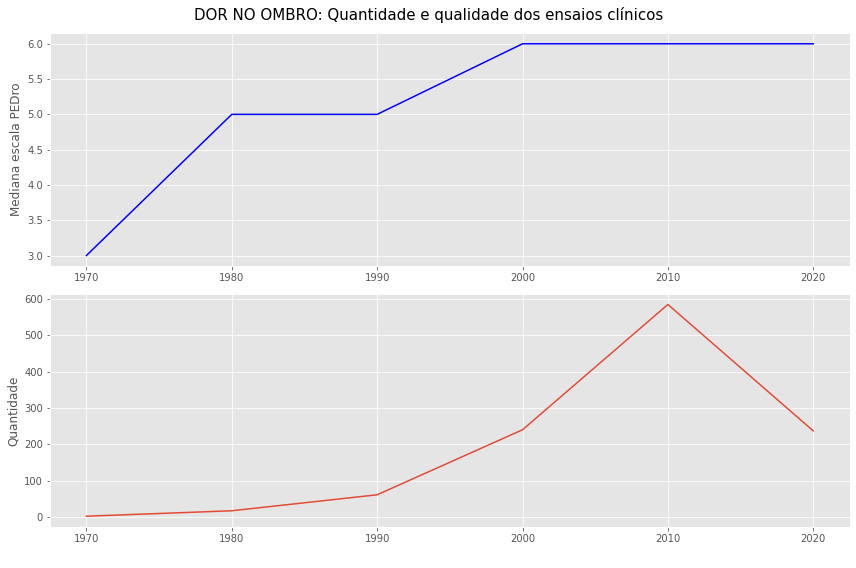

In [78]:
plt.figure(figsize=(12,8))
plt.suptitle('DOR NO OMBRO: Quantidade e qualidade dos ensaios clínicos', fontsize=(15))
plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df_dor_ombro3, x='decada', y='escala pedro', color='blue')
plt.xlabel('')
ax.set(ylabel='Mediana escala PEDro')
plt.subplot(2, 1, 2)
ax1 = sns.lineplot(data=df_dor_ombro3, x='decada', y='quantidade')
ax1.set(ylabel='Quantidade')
plt.xlabel(' ')

plt.tight_layout()

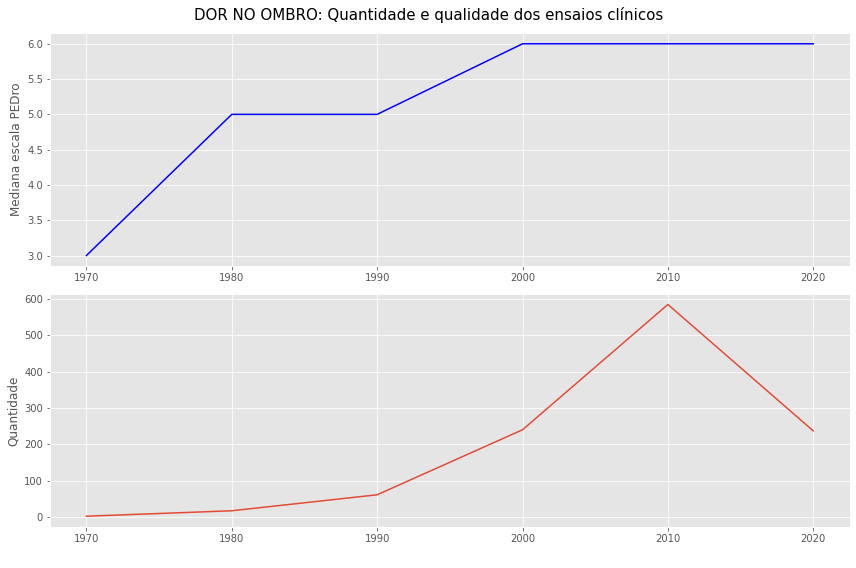

In [79]:
Image(filename='.../dor_ombro4.png')